## The Problem of Overfitting

Consider the problem of predicting $y$ from $y \in R$. The leftmost figure below shows the result of fitting a $y = \theta_0 + \theta_1x$ to a dataset. We see that the data doesn't really lie on straight line, and so the fit is not very good.

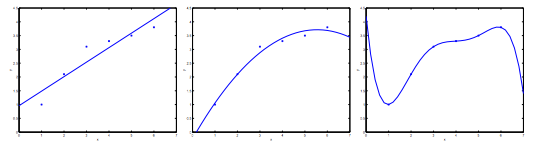

Instead, if we had added an extra feature $x^2$, and fit $y = \theta_0 + \theta_1x + \theta_2x^2$, then we obtain a slightly better fit to the data (middle figure).

Naively, it might seem that the more featyres we add, the better. 

Howeverm there is alse a dange in adding too many features: The rightmost figure is the result of fitting a $t^{th}$ order polynomial $y = \sum^5_{j=0}\theta_jx^j$. We see that even though the fitted curve passes through the data perfectly, we would not expect this to be a very good predict of, sat, housing prices($y$) for different living areas ($x$). Without formally defining hat these terms mean, we'll say the figure on the left shows an instance of underfitting - in which the data clearly shows structure not captured by the model - and the figure on the left show an instance of **underfitting** - in which the data clearly shows structure not captured by the model - and the figure on the righht is an example of **overfitting**.

Underfitting, or high bias, is when the form of our hypothesis function $h$ maps poorly to the trend of the data. It is usually caused by a funcation that is too simple or uses too few features. 

At the other extreme, overfitting, or high variance, is caused by a hypothesis function that fits the available data bur does not generalize well to predict new data. It is usually caused by a complicated function that creates a lot of unnecessary curves and angles unrelated to the data.

-----------------

This terminology is applied both to both linear and logistic regression. There are two main options to address the issue of overfitting:

1) Reduce the number of features:
- Manually select which features to keep.
- Use a model selection algorithm.

2) Regularization:
- Keep all the features, but reduce the magnitude of parameters $\theta_j$.
- Regularization works well when we have a lot of sightly useful features.

## Cost Function

If we have overfitting from our hypothesis function, we can reduce the weight that some of the terms in our function carry by increasing their cost.

Say we wanted to make the following function more quadratic:

$$
\theta_0 + \theta_1x + \theta_2x^2 + \theta_3x^3 + \theta_4x^4
$$

We'll want to eliminate the influence of $\theta_3x^3$ and $\theta_4x^4$. Without actually detting rid of these features or changing the form of our hypothesis, we can instead modify our **cost function**.

$$
\text{min}_{\theta} \ \frac{1}{2m} \sum^{m}_{i=1}(h_{\theta}(x^{(i)}) - y^{(i)})^2 + 1000 \bullet \theta_3^2 + 1000 \bullet \theta^2_4
$$

We've added two extra terms at the end to inflate the cost of $\theta_3$ and $\theta_4$.

Now, in order for the cost function to get close to zero, we will have to reduce the values of $\theta_3$ and $\theta_4$ to near zero, This will in turn greatly reduce the values of $\theta_3x^3$a and $\theta_4x^4$ in our hypothesis function. As a result, we see that the new hypothesis (depicted by the pink curve) looks like a quadratic function but fits the data better due to the extra small terms $\theta_3x^3$ and $\theta_4x^4$.

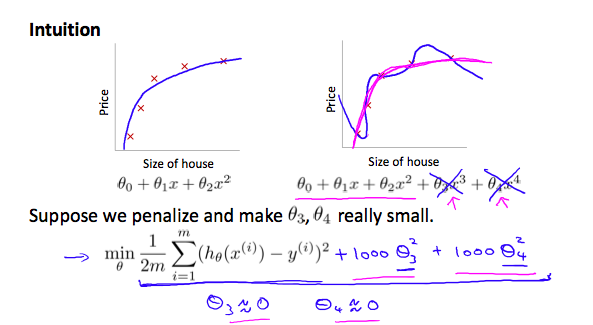

We could also regularize all of our parameters in a single ummation as:

$$
\text{min}_{\theta} \frac{m}{i=1}(h_{\theta}(x^{(i)}) - y^{(i)})^2 + \lambda \ \sum^n_{j=1} \theta^2_j
$$

The $\lambda$ is the **regularization parameter**. It determines how much the costs of our theta parameters are inflated.

Using the above cost function with extra summation, we can smooth the output of our hypothesis function to reduce overfitting. If lambda is chosen to be too large, it may smooth out the function too much and cause underfitting. Hence, what would happen if $\lambda = 0$ or is too small?

## Regularized Linear Regression

We can apply regularization to both linear regression and logistic regression. We will approach linear regression first.

#### Gradient Descent

We will modify our gradient descent function to separate out $\theta_0$ from the rest of the parameters because we do not want to penalize $\theta_0$.

$$
\begin{align}
& \text{Repeat:} \{ \\
& \theta_0 := \theta_0 - \alpha \ \frac{1}{m} \ \sum^m_{i=1} (h_{\theta}(x^{(i)}) - y^{(i)})x^{(i)}_0 \\
& \theta_0 := \theta_0 - \alpha \ \big[ \big( \frac{1}{m} \ \sum^m_{i=1}(h_{\theta}(x^{(i)}) - y^{(i)})x^{(i)}_j \big) + \frac{\lambda}{m} \theta_j \big] \qquad j \in \{ 1, 2, ..., n \} \\
& \}
\end{align}
$$

The term $\frac{\lambda}{m} \theta_j$ performs our regularization. With ome manipulation ur update rule can also be represented as:

$$
\theta_j := \theta_j (1 - \alpha \frac{\lambda}{m}) - \alpha \frac{1}{m} \sum^m_{i=1}(h_{\theta}(x^{(i)}) - y^{(i)})x^{(i)}_j
$$

The first term in the above equation, $1 - \alpha \frac{\lambda}{m}$ will always be less than $1$. Intuitively you can see it as reduing the value of $\theta_j$ by some amount on every update. Notice that the second term is now exactly the same as it was before.

#### Normal Equation

Now let's approach regularization using the alternate method of the non-iterative normal equation.

To add in regularization, the equation is the same as our original, xcept that we add another term inside the parenthesis:

$$
\begin{align}
& \theta = \big( X^TX + \lambda \bullet L)^{-1}X^Ty \\
& \text{where} \ L = \begin{bmatrix}
0 & \quad & \quad & \quad  & \quad \\
\quad & 1 & \quad & \quad  & \quad \\
\quad & \quad & 1 & \quad  & \quad \\
\quad & \quad & \quad & \ddots  & \quad \\
\quad  & \quad  & \quad & \quad  &1 
\end{bmatrix}
\end{align}
$$

$L$ is a matrix with $0$ at the top left and $1$s down the diagonal, with $0$s wverywhere else. It should have dimension $(n + 1) \times (n + 1)$. Intuitively, this is the identity matrix (though we are not including $x+0$), multiplied with a single real number $\lambda$.

Recall that if $m < n$, then $X^TX$ is non-invertible. However, when we add the term $\lambda \bullet L$, then $X^TX + \lambda \bullet L$ becomes invertible.

## Regularized Logistic Regression

We can regularize logistic regression in a similar way that we regularize linear regresion. As a result, we can avoid overfitting. The following image shows how the regularized function, displayed by the pink line, is less likely to overfit than the non-regularized function represented by the blue line:

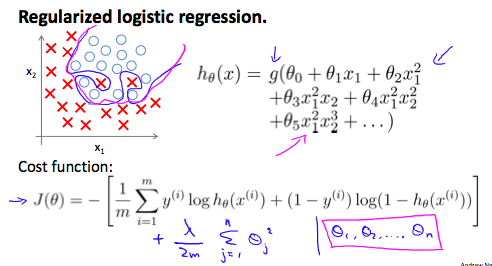

#### Cost Function

Recall that our cost function for logistic regression was:

$$
J(\theta) = -\frac{1}{m} \sum^m_{i=1} \big[ y^{(i)} \text{log}(h_{\theta}(x^{(i)})) + (1 - y^{(i)}) \text{log}(1 - h_{\theta}(x^{(i)})) \big]
$$

We can regularize this equation by adding a term to the end:

$$
J(\theta) = -\frac{1}{m} \sum^m_{i=1} \big[ y^{(i)} \text{log}(h_{\theta}(x^{(i)})) + (1 - y^{(i)}) \text{log}(1 - h_{\theta}(x^{(i)})) \big] + \frac{\lambda}{2m} \sum^n_{j=1} \theta^2_j
$$

The second sum, $\sum^n_{j=1} \theta^2_j$ **means to explicitly exclude** the bias term, $\theta_0$. I. e. the $\theta$ vector is indexed from $0$ to $n$ (holding $n + 1$ values, $\theta_0 through $theta_n$), and this sum explicitly skips $\theta_0$, by running from $1$ to $n$, skipping $0$. Thus, when computing the equation, we should xontinously update the two following equations:

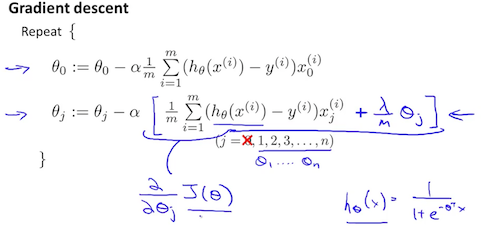